In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
rawDfRx = pd.read_csv('sar_mpgu_izh.csv', skiprows=61378, sep='\s+', skipinitialspace=True, nrows=(62744-61379), engine='python')
rawDfRx.tail()

,09:20:06,IFACE,rxpck/s,txpck/s,rxkB/s,txkB/s,rxcmp/s,txcmp/s,rxmcst/s
1360,12:35:06,eth1,0.00,0.0,0.00,0.00,0.0,0.0,0.0
1361,12:35:06,eth2,0.00,0.0,0.00,0.00,0.0,0.0,0.0
1362,12:35:06,eth3,0.00,0.0,0.00,0.00,0.0,0.0,0.0
1363,12:35:06,eth0.703,536.13,353.2,107.59,1337.04,0.0,0.0,0.0
1364,12:35:06,usb0,0.00,0.0,0.00,0.00,0.0,0.0,0.0


In [3]:
time = rawDfRx.iloc[:,0]
time = pd.to_datetime(time).apply(lambda t: t.strftime('%H:%M'))
y1 = rawDfRx.iloc[:, 5].astype(float)
y2 = rawDfRx.iloc[:, 4].astype(float)
print(y2)

0         0.00
1       554.57
2         0.00
3         0.00
4         0.00
         ...  
1360      0.00
1361      0.00
1362      0.00
1363    107.59
1364      0.00
Name: rxkB/s, Length: 1365, dtype: float64


In [4]:
y1 = y1 / 1024
print(y1)
y2 = y2 / 1024
print(y2)


0       0.000000
1       0.715059
2       0.000000
3       0.000000
4       0.000000
          ...   
1360    0.000000
1361    0.000000
1362    0.000000
1363    1.305703
1364    0.000000
Name: txkB/s, Length: 1365, dtype: float64
0       0.000000
1       0.541572
2       0.000000
3       0.000000
4       0.000000
          ...   
1360    0.000000
1361    0.000000
1362    0.000000
1363    0.105068
1364    0.000000
Name: rxkB/s, Length: 1365, dtype: float64


In [5]:
dfTx = pd.DataFrame({'Time': time, 'IFACE': rawDfRx.iloc[:,1], 'txkB/s': y1})
dfRx = pd.DataFrame({'Time': time, 'IFACE': rawDfRx.iloc[:,1], 'rxkB/s': y2})
dfTx_temp = dfTx[dfTx['txkB/s'] != 0]
# dfRx = dfRx[dfRx['rxkB/s'] != 0]
dfTx.tail()

,Time,IFACE,txkB/s
1360,12:35,eth1,0.000000
1361,12:35,eth2,0.000000
1362,12:35,eth3,0.000000
1363,12:35,eth0.703,1.305703
1364,12:35,usb0,0.000000


In [6]:
dev_names = set(dfTx_temp['IFACE'])
print(dev_names)

{'eth0', 'eth0.703'}


In [7]:
dfTx1 = dfTx[dfTx['IFACE'] == 'eth0']
dfTx2 = dfTx[dfTx['IFACE'] == 'eth0.703']
dfTx2.tail()

,Time,IFACE,txkB/s
1335,12:31,eth0.703,1.403896
1342,12:32,eth0.703,1.424600
1349,12:33,eth0.703,1.437959
1356,12:34,eth0.703,1.096094
1363,12:35,eth0.703,1.305703


In [8]:
dfRx1 = dfRx[dfRx['IFACE'] == 'eth0']
dfRx2 = dfRx[dfRx['IFACE'] == 'eth0.703']
dfRx2.tail()

,Time,IFACE,rxkB/s
1335,12:31,eth0.703,0.108613
1342,12:32,eth0.703,0.111113
1349,12:33,eth0.703,0.121328
1356,12:34,eth0.703,0.090723
1363,12:35,eth0.703,0.105068


In [9]:
dfTx1.reset_index(inplace=True, drop=True)
dfTx2.reset_index(inplace=True, drop=True)
dfRx1.reset_index(inplace=True, drop=True)
dfRx2.reset_index(inplace=True, drop=True)

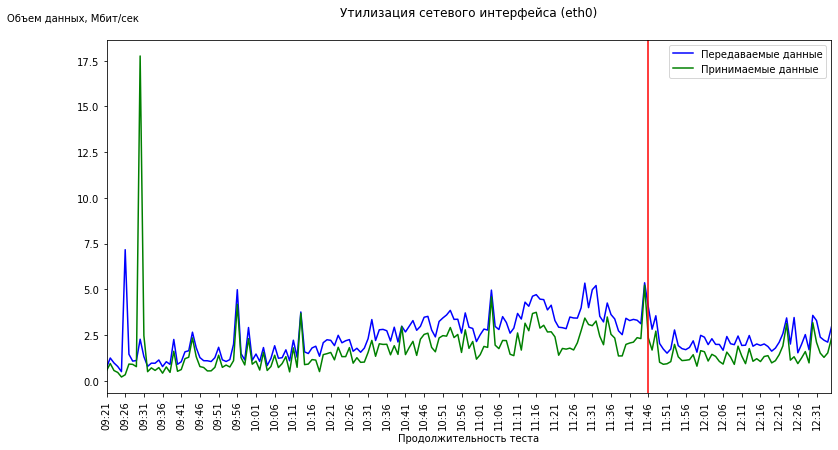

In [10]:
# График для eth0
fig, ax = plt.subplots(figsize=(12.992, 6.496))
ax.plot(dfTx1.Time, dfTx1['txkB/s'], 'b',label='Передаваемые данные')
ax.plot(dfRx1.Time, dfRx1['rxkB/s'], 'g', label='Принимаемые данные')
plt.axvline(x='11:46', color='r')
ax.set_xlabel('Продолжительность теста')
ax.set_ylabel('Объем данных, Мбит/сек', rotation=0, y=1.05)
ax.set_title('Утилизация сетевого интерфейса (eth0)', y=1.05)
ax.legend(loc=1)
ax.tick_params(axis='x', labelrotation=90)
# ax.set_ylim(0,20)

xAxis = np.arange(0, dfTx1.index[-1],5)
plt.xlim(dfTx1['Time'][0], dfTx1['Time'][dfTx1.index[-1]])
plt.xticks(xAxis, dfTx1['Time'][xAxis], rotation='vertical')

plt.savefig('Утилизация сетевого интерфейса_1')
plt.show()
plt.close()

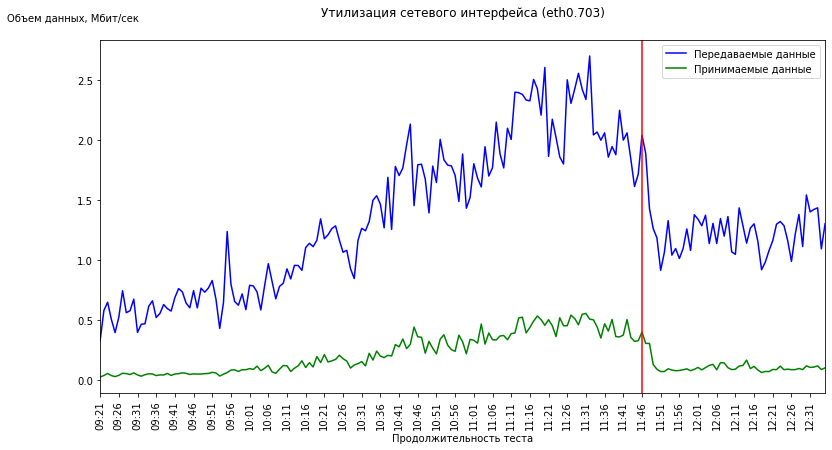

In [11]:
# График для eth0.703
fig, ax = plt.subplots(figsize=(12.992, 6.496))
ax.plot(dfTx2.Time, dfTx2['txkB/s'], 'b',label='Передаваемые данные')
ax.plot(dfRx2.Time, dfRx2['rxkB/s'], 'g', label='Принимаемые данные')
plt.axvline(x='11:46', color='r')
ax.set_xlabel('Продолжительность теста')
ax.set_ylabel('Объем данных, Мбит/сек', rotation=0, y=1.05)
ax.set_title('Утилизация сетевого интерфейса (eth0.703)', y=1.05)
ax.legend(loc=1)
ax.tick_params(axis='x', labelrotation=90)
# ax.set_ylim(0,20)

xAxis = np.arange(0, dfTx2.index[-1],5)
plt.xlim(dfTx2['Time'][0], dfTx2['Time'][dfTx2.index[-1]])
plt.xticks(xAxis, dfTx2['Time'][xAxis], rotation='vertical')

plt.savefig('Утилизация сетевого интерфейса_2')
plt.show()
plt.close()